In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#To normalize the data and make it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id         name symbol                  slug  num_market_pairs  \
0      1      Bitcoin    BTC               bitcoin             10087   
1   1027     Ethereum    ETH              ethereum              6567   
2    825       Tether   USDT                tether             49124   
3   1839          BNB    BNB                   bnb              1211   
4   3408     USD Coin   USDC              usd-coin             10544   
5     52          XRP    XRP                   xrp               903   
6   2010      Cardano    ADA               cardano               672   
7   3890      Polygon  MATIC               polygon               607   
8     74     Dogecoin   DOGE              dogecoin               655   
9   4687  Binance USD   BUSD           binance-usd              6405   
10  5426       Solana    SOL                solana               439   
11  6636     Polkadot    DOT          polkadot-new               479   
12  5994    Shiba Inu   SHIB             shiba-inu               493   
13  4943          Dai    DAI  multi-collateral-dai              1962   
14  1958         TRON    TRX                  tron               735   

                  date_added  \
0   2013-04-28T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2018-10-08T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2019-04-28T00:00:00.000Z   
8   2013-12-15T00:00:00.000Z   
9   2019-09-20T00:00:00.000Z   
10  2020-04-10T00:00:00.000Z   
11  2020-08-19T00:00:00.000Z   
12  2020-08-01T00:00:00.000Z   
13  2019-11-22T00:00:00.000Z   
14  2017-09-13T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
7   [platform, enterprise-solutions, zero-knowledg...  1.000000e+10   
8   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
9   [stablecoin, asset-backed-stablecoin, binance-...           NaN   
10  [pos, platform, solana-ecosystem, cms-holdings...           NaN   
11  [substrate, polkadot, binance-chain, polkadot-...           NaN   
12      [memes, ethereum-ecosystem, doggone-doggerel]           NaN   
13  [defi, stablecoin, asset-backed-stablecoin, et...           NaN   
14                  [media, payments, tron-ecosystem]           NaN   

    circulating_supply  total_supply  platform  cmc_rank  \
0         1.931442e+07  1.931442e+07       NaN         1   
1         1.223739e+08  1.223739e+08       NaN         2   
2         7.207450e+10  7.314177e+10       NaN         3   
3         1.578929e+08  1.599800e+08       NaN         4   
4         4.087806e+10  4.087806e+10       NaN         5   
5         5.095091e+10  9.998911e+10       NaN         6   
6         3.469529e+10  3.555603e+10       NaN         7   
7         8.734317e+09  1.000000e+10       NaN         8   
8         1.326708e+11  1.326708e+11       NaN         9   
9         8.396421e+09  8.396421e+09       NaN        10   
10        3.829606e+08  5.393127e+08       NaN        11   
11        1.164991e+09  1.291415e+09       NaN        12   
12        5.490633e+14  5.897350e+14       NaN        13   
13        5.723810e+09  5.723810e+09       NaN        14   
14        9.129123e+10  9.129138e+10       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_ratio  \
0                                NaN                       NaN      None   
1                                NaN                       NaN      None   
2             

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner co

KeyboardInterrupt: ignored

In [7]:
df

id         name symbol                  slug  num_market_pairs  \
0      1      Bitcoin    BTC               bitcoin             10087   
1   1027     Ethereum    ETH              ethereum              6567   
2    825       Tether   USDT                tether             49124   
3   1839          BNB    BNB                   bnb              1211   
4   3408     USD Coin   USDC              usd-coin             10544   
5     52          XRP    XRP                   xrp               903   
6   2010      Cardano    ADA               cardano               672   
7   3890      Polygon  MATIC               polygon               607   
8     74     Dogecoin   DOGE              dogecoin               655   
9   4687  Binance USD   BUSD           binance-usd              6405   
10  5426       Solana    SOL                solana               439   
11  6636     Polkadot    DOT          polkadot-new               479   
12  5994    Shiba Inu   SHIB             shiba-inu               493   
13  4943          Dai    DAI  multi-collateral-dai              1962   
14  1958         TRON    TRX                  tron               735   
0      1      Bitcoin    BTC               bitcoin             10088   
1   1027     Ethereum    ETH              ethereum              6568   
2    825       Tether   USDT                tether             49124   
3   1839          BNB    BNB                   bnb              1211   
4   3408     USD Coin   USDC              usd-coin             10544   
5     52          XRP    XRP                   xrp               903   
6   2010      Cardano    ADA               cardano               672   
7   3890      Polygon  MATIC               polygon               607   
8     74     Dogecoin   DOGE              dogecoin               655   
9   4687  Binance USD   BUSD           binance-usd              6405   
10  5426       Solana    SOL                solana               439   
11  6636     Polkadot    DOT          polkadot-new               479   
12  5994    Shiba Inu   SHIB             shiba-inu               493   
13  4943          Dai    DAI  multi-collateral-dai              1962   
14  1958         TRON    TRX                  tron               735   
0      1      Bitcoin    BTC               bitcoin             10088   
1   1027     Ethereum    ETH              ethereum              6568   
2    825       Tether   USDT                tether             49124   
3   1839          BNB    BNB                   bnb              1211   
4   3408     USD Coin   USDC              usd-coin             10544   
5     52          XRP    XRP                   xrp               903   
6   2010      Cardano    ADA               cardano               672   
7   3890      Polygon  MATIC               polygon               607   
8     74     Dogecoin   DOGE              dogecoin               655   
9   4687  Binance USD   BUSD           binance-usd              6405   
10  5426       Solana    SOL                solana               439   
11  6636     Polkadot    DOT          polkadot-new               479   
12  5994    Shiba Inu   SHIB             shiba-inu               493   
13  4943          Dai    DAI  multi-collateral-dai              1962   
14  1958         TRON    TRX                  tron               735   
0      1      Bitcoin    BTC               bitcoin             10088   
1   1027     Ethereum    ETH              ethereum              6568   
2    825       Tether   USDT                tether             49124   
3   1839          BNB    BNB                   bnb              1211   
4   3408     USD Coin   USDC              usd-coin             10544   
5     52          XRP    XRP                   xrp               903   
6   2010      Cardano    ADA               cardano               672   
7   3890      Polygon  MATIC               polygon               607   
8     74     Dogecoin   DOGE              dogecoin               655   
9   4687  Binance USD   BUSD           binance

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

id         name symbol                  slug  num_market_pairs  \
0      1      Bitcoin    BTC               bitcoin             10087   
1   1027     Ethereum    ETH              ethereum              6567   
2    825       Tether   USDT                tether             49124   
3   1839          BNB    BNB                   bnb              1211   
4   3408     USD Coin   USDC              usd-coin             10544   
5     52          XRP    XRP                   xrp               903   
6   2010      Cardano    ADA               cardano               672   
7   3890      Polygon  MATIC               polygon               607   
8     74     Dogecoin   DOGE              dogecoin               655   
9   4687  Binance USD   BUSD           binance-usd              6405   
10  5426       Solana    SOL                solana               439   
11  6636     Polkadot    DOT          polkadot-new               479   
12  5994    Shiba Inu   SHIB             shiba-inu               493   
13  4943          Dai    DAI  multi-collateral-dai              1962   
14  1958         TRON    TRX                  tron               735   
0      1      Bitcoin    BTC               bitcoin             10088   
1   1027     Ethereum    ETH              ethereum              6568   
2    825       Tether   USDT                tether             49124   
3   1839          BNB    BNB                   bnb              1211   
4   3408     USD Coin   USDC              usd-coin             10544   
5     52          XRP    XRP                   xrp               903   
6   2010      Cardano    ADA               cardano               672   
7   3890      Polygon  MATIC               polygon               607   
8     74     Dogecoin   DOGE              dogecoin               655   
9   4687  Binance USD   BUSD           binance-usd              6405   
10  5426       Solana    SOL                solana               439   
11  6636     Polkadot    DOT          polkadot-new               479   
12  5994    Shiba Inu   SHIB             shiba-inu               493   
13  4943          Dai    DAI  multi-collateral-dai              1962   
14  1958         TRON    TRX                  tron               735   
0      1      Bitcoin    BTC               bitcoin             10088   
1   1027     Ethereum    ETH              ethereum              6568   
2    825       Tether   USDT                tether             49124   
3   1839          BNB    BNB                   bnb              1211   
4   3408     USD Coin   USDC              usd-coin             10544   
5     52          XRP    XRP                   xrp               903   
6   2010      Cardano    ADA               cardano               672   
7   3890      Polygon  MATIC               polygon               607   
8     74     Dogecoin   DOGE              dogecoin               655   
9   4687  Binance USD   BUSD           binance-usd              6405   
10  5426       Solana    SOL                solana               439   
11  6636     Polkadot    DOT          polkadot-new               479   
12  5994    Shiba Inu   SHIB             shiba-inu               493   
13  4943          Dai    DAI  multi-collateral-dai              1962   
14  1958         TRON    TRX                  tron               735   
0      1      Bitcoin    BTC               bitcoin             10088   
1   1027     Ethereum    ETH              ethereum              6568   
2    825       Tether   USDT                tether             49124   
3   1839          BNB    BNB                   bnb              1211   
4   3408     USD Coin   USDC              usd-coin             10544   
5     52          XRP    XRP                   xrp               903   
6   2010      Cardano    ADA               cardano               672   
7   3890      Polygon  MATIC               polygon               607   
8     74     Dogecoin   DOGE              dogecoin               655   
9   4687  Binance USD   BUSD           binance

In [10]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                         -0.00478                       1.57884   
Ethereum                         0.05184                       2.30416   
Tether                           0.22443                       0.90203   
BNB                              0.00837                       0.40191   
USD Coin                         0.60676                      -7.81165   
XRP                              0.38134                      -0.96784   
Cardano                         -0.17715                      -1.48823   
Polygon                         -0.30388                      -0.90327   
Dogecoin                        -0.31845                      -0.04210   
Binance USD                      0.08680                      -0.00789   
Solana                          -0.56323                      -0.95194   
Polkadot                        -0.47328                      -2.45735   
Shiba Inu                       -0.38130                      -0.73908   
Dai                              0.52565                      -6.23242   
TRON                             0.03565                      -0.91216   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Bitcoin                         -9.29300                     -10.41074   
Ethereum                        -7.86379                     -11.64893   
Tether                           0.88847                       0.88434   
BNB                             -5.41482                     -13.86169   
USD Coin                        -7.79952                      -7.79931   
XRP                             -2.94605                      -9.49159   
Cardano                         -9.73341                     -20.59577   
Polygon                        -10.81044                     -22.95536   
Dogecoin                       -14.65920                     -26.50755   
Binance USD                      0.01554                       0.02576   
Solana                         -17.29940                     -23.40038   
Polkadot                       -11.18897                     -22.39156   
Shiba Inu                      -10.98857                     -24.05610   
Dai                             -6.20388                      -6.19267   
TRON                           -16.35233                     -14.08073   

             quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                     
Bitcoin                          17.01593                      18.09750  
Ethereum                          8.21819                      13.33754  
Tether                            0.89784                       0.89191  
BNB                              -0.24031                      -5.08318  
USD Coin                         -7.81100                      -7.80685  
XRP                               4.26474                      -5.62551  
Cardano                          -3.87044                      -1.72738  
Polygon                          20.08626                      12.11754  
Dogecoin                        -15.39763                     -32.72534  
Binance USD                      -0.00506                       0.02396  
Solana                            7.32765                      27.16177  
Polkadot                          8.10431                       0.49503  
Shiba Inu                         8.62145                       8.53961  
Dai                              -6.22751                      -6.22440  
TRON                              3.25781                       3.40047

In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.00478
             quote.USD.percent_change_24h     1.57884
             quote.USD.percent_change_7d     -9.29300
             quote.USD.percent_change_30d   -10.41074
             quote.USD.percent_change_60d    17.01593
             quote.USD.percent_change_90d    18.09750
Ethereum     quote.USD.percent_change_1h      0.05184
             quote.USD.percent_change_24h     2.30416
             quote.USD.percent_change_7d     -7.86379
             quote.USD.percent_change_30d   -11.64893
             quote.USD.percent_change_60d     8.21819
             quote.USD.percent_change_90d    13.33754
Tether       quote.USD.percent_change_1h      0.22443
             quote.USD.percent_change_24h     0.90203
             quote.USD.percent_change_7d      0.88847
             quote.USD.percent_change_30d     0.88434
             quote.USD.percent_change_60d     0.89784
             quote.USD.percent_change_90

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.00478
            quote.USD.percent_change_24h   1.57884
            quote.USD.percent_change_7d   -9.29300
            quote.USD.percent_change_30d -10.41074
            quote.USD.percent_change_60d  17.01593
            quote.USD.percent_change_90d  18.09750
Ethereum    quote.USD.percent_change_1h    0.05184
            quote.USD.percent_change_24h   2.30416
            quote.USD.percent_change_7d   -7.86379
            quote.USD.percent_change_30d -11.64893
            quote.USD.percent_change_60d   8.21819
            quote.USD.percent_change_90d  13.33754
Tether      quote.USD.percent_change_1h    0.22443
            quote.USD.percent_change_24h   0.90203
            quote.USD.percent_change_7d    0.88847
            quote.USD.percent_change_30d   0.88434
            quote.USD.percent_change_60d   0.89784
            quote.USD.percent_change_90d   0.89191
BNB         quote.USD.percent_change_1h    0.00837
            quote.USD.percent_change_24h   0.40191
            quote.USD.percent_change_7d   -5.41482
            quote.USD.percent_change_30d -13.86169
            quote.USD.percent_change_60d  -0.24031
            quote.USD.percent_change_90d  -5.08318
USD Coin    quote.USD.percent_change_1h    0.60676
            quote.USD.percent_change_24h  -7.81165
            quote.USD.percent_change_7d   -7.79952
            quote.USD.percent_change_30d  -7.79931
            quote.USD.percent_change_60d  -7.81100
            quote.USD.percent_change_90d  -7.80685
XRP         quote.USD.percent_change_1h    0.38134
            quote.USD.percent_change_24h  -0.96784
            quote.USD.percent_change_7d   -2.94605
            quote.USD.percent_change_30d  -9.49159
            quote.USD.percent_change_60d   4.26474
            quote.USD.percent_change_90d  -5.62551
Cardano     quote.USD.percent_change_1h   -0.17715
            quote.USD.percent_change_24h  -1.48823
            quote.USD.percent_change_7d   -9.73341
            quote.USD.percent_change_30d -20.59577
            quote.USD.percent_change_60d  -3.87044
            quote.USD.percent_change_90d  -1.72738
Polygon     quote.USD.percent_change_1h   -0.30388
            quote.USD.percent_change_24h  -0.90327
            quote.USD.percent_change_7d  -10.81044
            quote.USD.percent_change_30d -22.95536
            quote.USD.percent_change_60d  20.08626
            quote.USD.percent_change_90d  12.11754
Dogecoin    quote.USD.percent_change_1h   -0.31845
            quote.USD.percent_change_24h  -0.04210
            quote.USD.percent_change_7d  -14.65920
            quote.USD.percent_change_30d -26.50755
            quote.USD.percent_change_60d -15.39763
            quote.USD.percent_change_90d -32.72534
Binance USD quote.USD.percent_change_1h    0.08680
            quote.USD.percent_change_24h  -0.00789
            quote.USD.percent_change_7d    0.01554
            quote.USD.percent_change_30d   0.02576
            quote.USD.percent_change_60d  -0.00506
            quote.USD.percent_change_90d   0.02396
Solana      quote.USD.percent_change_1h   -0.56323
            quote.USD.percent_change_24h  -0.95194
            quote.USD.percent_change_7d  -17.29940
            quote.USD.percent_change_30d -23.40038
            quote.USD.percent_change_60d   7.32765
            quote.USD.percent_change_90d  27.16177
Polkadot    quote.USD.percent_change_1h   -0.47328
            quote.USD.percent_change_24h  -2.45735
            quote.USD.percent_change_7d  -11.18897
            quote.USD.percent_change_30d -22.39156
            quote.USD.percent_change_60d   8.10431
            quote.USD.percent_change_90d   0.49503
Shiba Inu   quote.USD.percent_change_1h   -0.38130
            quote.USD.percent_change_24h  -0.73908
            quote.USD.percent_change_7d  -10.98857
            quote.USD.percent_change_30d -24.05610
            quote.USD.percent_change_60d   8.62145
            quo

In [14]:
df5.count()

values    90
dtype: int64

In [27]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. 


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

name                       level_1    values
0       Bitcoin   quote.USD.percent_change_1h  -0.00478
1       Bitcoin  quote.USD.percent_change_24h   1.57884
2       Bitcoin   quote.USD.percent_change_7d  -9.29300
3       Bitcoin  quote.USD.percent_change_30d -10.41074
4       Bitcoin  quote.USD.percent_change_60d  17.01593
5       Bitcoin  quote.USD.percent_change_90d  18.09750
6      Ethereum   quote.USD.percent_change_1h   0.05184
7      Ethereum  quote.USD.percent_change_24h   2.30416
8      Ethereum   quote.USD.percent_change_7d  -7.86379
9      Ethereum  quote.USD.percent_change_30d -11.64893
10     Ethereum  quote.USD.percent_change_60d   8.21819
11     Ethereum  quote.USD.percent_change_90d  13.33754
12       Tether   quote.USD.percent_change_1h   0.22443
13       Tether  quote.USD.percent_change_24h   0.90203
14       Tether   quote.USD.percent_change_7d   0.88847
15       Tether  quote.USD.percent_change_30d   0.88434
16       Tether  quote.USD.percent_change_60d   0.89784
17       Tether  quote.USD.percent_change_90d   0.89191
18          BNB   quote.USD.percent_change_1h   0.00837
19          BNB  quote.USD.percent_change_24h   0.40191
20          BNB   quote.USD.percent_change_7d  -5.41482
21          BNB  quote.USD.percent_change_30d -13.86169
22          BNB  quote.USD.percent_change_60d  -0.24031
23          BNB  quote.USD.percent_change_90d  -5.08318
24     USD Coin   quote.USD.percent_change_1h   0.60676
25     USD Coin  quote.USD.percent_change_24h  -7.81165
26     USD Coin   quote.USD.percent_change_7d  -7.79952
27     USD Coin  quote.USD.percent_change_30d  -7.79931
28     USD Coin  quote.USD.percent_change_60d  -7.81100
29     USD Coin  quote.USD.percent_change_90d  -7.80685
30          XRP   quote.USD.percent_change_1h   0.38134
31          XRP  quote.USD.percent_change_24h  -0.96784
32          XRP   quote.USD.percent_change_7d  -2.94605
33          XRP  quote.USD.percent_change_30d  -9.49159
34          XRP  quote.USD.percent_change_60d   4.26474
35          XRP  quote.USD.percent_change_90d  -5.62551
36      Cardano   quote.USD.percent_change_1h  -0.17715
37      Cardano  quote.USD.percent_change_24h  -1.48823
38      Cardano   quote.USD.percent_change_7d  -9.73341
39      Cardano  quote.USD.percent_change_30d -20.59577
40      Cardano  quote.USD.percent_change_60d  -3.87044
41      Cardano  quote.USD.percent_change_90d  -1.72738
42      Polygon   quote.USD.percent_change_1h  -0.30388
43      Polygon  quote.USD.percent_change_24h  -0.90327
44      Polygon   quote.USD.percent_change_7d -10.81044
45      Polygon  quote.USD.percent_change_30d -22.95536
46      Polygon  quote.USD.percent_change_60d  20.08626
47      Polygon  quote.USD.percent_change_90d  12.11754
48     Dogecoin   quote.USD.percent_change_1h  -0.31845
49     Dogecoin  quote.USD.percent_change_24h  -0.04210
50     Dogecoin   quote.USD.percent_change_7d -14.65920
51     Dogecoin  quote.USD.percent_change_30d -26.50755
52     Dogecoin  quote.USD.percent_change_60d -15.39763
53     Dogecoin  quote.USD.percent_change_90d -32.72534
54  Binance USD   quote.USD.percent_change_1h   0.08680
55  Binance USD  quote.USD.percent_change_24h  -0.00789
56  Binance USD   quote.USD.percent_change_7d   0.01554
57  Binance USD  quote.USD.percent_change_30d   0.02576
58  Binance USD  quote.USD.percent_change_60d  -0.00506
59  Binance USD  quote.USD.percent_change_90d   0.02396
60       Solana   quote.USD.percent_change_1h  -0.56323
61       Solana  quote.USD.percent_change_24h  -0.95194
62       Solana   quote.USD.percent_change_7d -17.29940
63       Solana  quote.USD.percent_change_30d -23.40038
64       Solana  quote.USD.percent_change_60d   7.32765
65       Solana  quote.USD.percent_change_90d  27.16177
66     Polkadot   quote.USD.percent_change_1h  -0.47328
67     Polkadot  quote.USD.percent_change_24h  -2.45735
68     Polkadot   quote.USD.percent_change_7d -11.18897
69     Polkadot  quote.USD.percent_change_30d -22.39156
70     Polkadot  quote.USD.percent_

In [28]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change    values
0       Bitcoin   quote.USD.percent_change_1h  -0.00478
1       Bitcoin  quote.USD.percent_change_24h   1.57884
2       Bitcoin   quote.USD.percent_change_7d  -9.29300
3       Bitcoin  quote.USD.percent_change_30d -10.41074
4       Bitcoin  quote.USD.percent_change_60d  17.01593
5       Bitcoin  quote.USD.percent_change_90d  18.09750
6      Ethereum   quote.USD.percent_change_1h   0.05184
7      Ethereum  quote.USD.percent_change_24h   2.30416
8      Ethereum   quote.USD.percent_change_7d  -7.86379
9      Ethereum  quote.USD.percent_change_30d -11.64893
10     Ethereum  quote.USD.percent_change_60d   8.21819
11     Ethereum  quote.USD.percent_change_90d  13.33754
12       Tether   quote.USD.percent_change_1h   0.22443
13       Tether  quote.USD.percent_change_24h   0.90203
14       Tether   quote.USD.percent_change_7d   0.88847
15       Tether  quote.USD.percent_change_30d   0.88434
16       Tether  quote.USD.percent_change_60d   0.89784
17       Tether  quote.USD.percent_change_90d   0.89191
18          BNB   quote.USD.percent_change_1h   0.00837
19          BNB  quote.USD.percent_change_24h   0.40191
20          BNB   quote.USD.percent_change_7d  -5.41482
21          BNB  quote.USD.percent_change_30d -13.86169
22          BNB  quote.USD.percent_change_60d  -0.24031
23          BNB  quote.USD.percent_change_90d  -5.08318
24     USD Coin   quote.USD.percent_change_1h   0.60676
25     USD Coin  quote.USD.percent_change_24h  -7.81165
26     USD Coin   quote.USD.percent_change_7d  -7.79952
27     USD Coin  quote.USD.percent_change_30d  -7.79931
28     USD Coin  quote.USD.percent_change_60d  -7.81100
29     USD Coin  quote.USD.percent_change_90d  -7.80685
30          XRP   quote.USD.percent_change_1h   0.38134
31          XRP  quote.USD.percent_change_24h  -0.96784
32          XRP   quote.USD.percent_change_7d  -2.94605
33          XRP  quote.USD.percent_change_30d  -9.49159
34          XRP  quote.USD.percent_change_60d   4.26474
35          XRP  quote.USD.percent_change_90d  -5.62551
36      Cardano   quote.USD.percent_change_1h  -0.17715
37      Cardano  quote.USD.percent_change_24h  -1.48823
38      Cardano   quote.USD.percent_change_7d  -9.73341
39      Cardano  quote.USD.percent_change_30d -20.59577
40      Cardano  quote.USD.percent_change_60d  -3.87044
41      Cardano  quote.USD.percent_change_90d  -1.72738
42      Polygon   quote.USD.percent_change_1h  -0.30388
43      Polygon  quote.USD.percent_change_24h  -0.90327
44      Polygon   quote.USD.percent_change_7d -10.81044
45      Polygon  quote.USD.percent_change_30d -22.95536
46      Polygon  quote.USD.percent_change_60d  20.08626
47      Polygon  quote.USD.percent_change_90d  12.11754
48     Dogecoin   quote.USD.percent_change_1h  -0.31845
49     Dogecoin  quote.USD.percent_change_24h  -0.04210
50     Dogecoin   quote.USD.percent_change_7d -14.65920
51     Dogecoin  quote.USD.percent_change_30d -26.50755
52     Dogecoin  quote.USD.percent_change_60d -15.39763
53     Dogecoin  quote.USD.percent_change_90d -32.72534
54  Binance USD   quote.USD.percent_change_1h   0.08680
55  Binance USD  quote.USD.percent_change_24h  -0.00789
56  Binance USD   quote.USD.percent_change_7d   0.01554
57  Binance USD  quote.USD.percent_change_30d   0.02576
58  Binance USD  quote.USD.percent_change_60d  -0.00506
59  Binance USD  quote.USD.percent_change_90d   0.02396
60       Solana   quote.USD.percent_change_1h  -0.56323
61       Solana  quote.USD.percent_change_24h  -0.95194
62       Solana   quote.USD.percent_change_7d -17.29940
63       Solana  quote.USD.percent_change_30d -23.40038
64       Solana  quote.USD.percent_change_60d   7.32765
65       Solana  quote.USD.percent_change_90d  27.16177
66     Polkadot   quote.USD.percent_change_1h  -0.47328
67     Polkadot  quote.USD.percent_change_24h  -2.45735
68     Polkadot   quote.USD.percent_change_7d -11.18897
69     Polkadot  quote.USD.percent_change_30d -22.39156
70     Polkadot  quote.USD.percent_

In [29]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

name               percent_change    values
0       Bitcoin  quote.USD.percent_change_1h  -0.00478
1       Bitcoin                          24h   1.57884
2       Bitcoin                           7d  -9.29300
3       Bitcoin                          30d -10.41074
4       Bitcoin                          60d  17.01593
5       Bitcoin                          90d  18.09750
6      Ethereum  quote.USD.percent_change_1h   0.05184
7      Ethereum                          24h   2.30416
8      Ethereum                           7d  -7.86379
9      Ethereum                          30d -11.64893
10     Ethereum                          60d   8.21819
11     Ethereum                          90d  13.33754
12       Tether  quote.USD.percent_change_1h   0.22443
13       Tether                          24h   0.90203
14       Tether                           7d   0.88847
15       Tether                          30d   0.88434
16       Tether                          60d   0.89784
17       Tether                          90d   0.89191
18          BNB  quote.USD.percent_change_1h   0.00837
19          BNB                          24h   0.40191
20          BNB                           7d  -5.41482
21          BNB                          30d -13.86169
22          BNB                          60d  -0.24031
23          BNB                          90d  -5.08318
24     USD Coin  quote.USD.percent_change_1h   0.60676
25     USD Coin                          24h  -7.81165
26     USD Coin                           7d  -7.79952
27     USD Coin                          30d  -7.79931
28     USD Coin                          60d  -7.81100
29     USD Coin                          90d  -7.80685
30          XRP  quote.USD.percent_change_1h   0.38134
31          XRP                          24h  -0.96784
32          XRP                           7d  -2.94605
33          XRP                          30d  -9.49159
34          XRP                          60d   4.26474
35          XRP                          90d  -5.62551
36      Cardano  quote.USD.percent_change_1h  -0.17715
37      Cardano                          24h  -1.48823
38      Cardano                           7d  -9.73341
39      Cardano                          30d -20.59577
40      Cardano                          60d  -3.87044
41      Cardano                          90d  -1.72738
42      Polygon  quote.USD.percent_change_1h  -0.30388
43      Polygon                          24h  -0.90327
44      Polygon                           7d -10.81044
45      Polygon                          30d -22.95536
46      Polygon                          60d  20.08626
47      Polygon                          90d  12.11754
48     Dogecoin  quote.USD.percent_change_1h  -0.31845
49     Dogecoin                          24h  -0.04210
50     Dogecoin                           7d -14.65920
51     Dogecoin                          30d -26.50755
52     Dogecoin                          60d -15.39763
53     Dogecoin                          90d -32.72534
54  Binance USD  quote.USD.percent_change_1h   0.08680
55  Binance USD                          24h  -0.00789
56  Binance USD                           7d   0.01554
57  Binance USD                          30d   0.02576
58  Binance USD                          60d  -0.00506
59  Binance USD                          90d   0.02396
60       Solana  quote.USD.percent_change_1h  -0.56323
61       Solana                          24h  -0.95194
62       Solana                           7d -17.29940
63       Solana                          30d -23.40038
64       Solana                          60d   7.32765
65       Solana                          90d  27.16177
66     Polkadot  quote.USD.percent_change_1h  -0.47328
67     Polkadot                          24h  -2.45735
68     Polkadot                           7d -11.18897
69     Polkadot                          30d -22.39156
70     Polkadot                          60d   8.10431
71     Polkadot                          90d   0.49

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

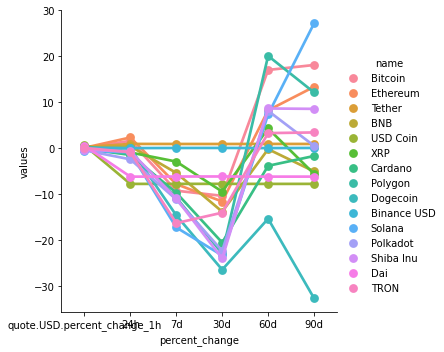

In [32]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [33]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

name  quote.USD.price                  timestamp
0  Bitcoin      20249.48856 2023-03-11 15:04:23.335674
0  Bitcoin      20283.40957                        NaT
0  Bitcoin      20281.96370                        NaT
0  Bitcoin      20287.03485                        NaT
0  Bitcoin      20289.56231                        NaT
0  Bitcoin      20289.43094                        NaT
0  Bitcoin      20282.10239                        NaT
0  Bitcoin      20271.87159                        NaT
0  Bitcoin      20269.66107                        NaT
0  Bitcoin      20274.19177                        NaT
0  Bitcoin      20276.62490                        NaT
0  Bitcoin      20273.31952                        NaT
0  Bitcoin      20271.67101                        NaT
0  Bitcoin      20263.49464                        NaT
0  Bitcoin      20264.27932                        NaT
0  Bitcoin      20266.67294                        NaT
0  Bitcoin      20268.76776                        NaT
0  Bitcoin      20262.87300                        NaT
0  Bitcoin      20271.12896                        NaT
0  Bitcoin      20272.83134                        NaT
0  Bitcoin      20270.28463                        NaT
0  Bitcoin      20271.61248                        NaT
0  Bitcoin      20272.27727                        NaT
0  Bitcoin      20272.27727                        NaT
0  Bitcoin      20274.96835                        NaT
0  Bitcoin      20274.07089                        NaT
0  Bitcoin      20262.81749                        NaT
0  Bitcoin      20259.01548                        NaT
0  Bitcoin      20257.34138                        NaT
0  Bitcoin      20266.49024                        NaT
0  Bitcoin      20264.79227                        NaT
0  Bitcoin      20259.42569                        NaT
0  Bitcoin      20255.75224                        NaT
0  Bitcoin      20242.79277                        NaT
0  Bitcoin      20245.15193                        NaT
0  Bitcoin      20254.33688                        NaT
0  Bitcoin      20279.18344                        NaT
0  Bitcoin      20279.03619                        NaT
0  Bitcoin      20285.01534                        NaT
0  Bitcoin      20287.58097                        NaT
0  Bitcoin      20280.89581                        NaT
0  Bitcoin      20265.05490                        NaT
0  Bitcoin      20225.52895                        NaT
0  Bitcoin      20233.68851                        NaT
0  Bitcoin      20237.72023                        NaT
0  Bitcoin      20250.56712                        NaT
0  Bitcoin      20247.84774                        NaT
0  Bitcoin      20253.03799                        NaT
0  Bitcoin      20240.13282                        NaT
0  Bitcoin      20238.70945                        NaT
0  Bitcoin      20235.44092                        NaT
0  Bitcoin      20250.71617                        NaT
0  Bitcoin      20247.25467                        NaT
0  Bitcoin      20249.66009                        NaT
0  Bitcoin      20263.03339                        NaT
0  Bitcoin      20272.34378                        NaT